# Wide binaries' hidden tertiaries companions

In this notebook we show the steps to compute the projected 2D relative velocities of a mock set of wide binaries, based on observational data and assuming a certain distribution of hidden companions in either one or both components of the binary system.

1. Import the necessary Python packages:

In [3]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from binaryStatistics.hidden_tertiaries.hidden_tertiaries import HiddenTertiaries

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2. Extract the wide binaries' observational data into a Pandas DataFrame:

In [4]:
binary_dataframe = pd.read_csv("../data/667Bp_0.8.csv")

3. Use the local `set_hidden_companions_distribution` function to create new columns in the DataFrame with the masses of the randomly-created distribution of hidden companions. 

The `frac` parameters indicates the fraction of wide binaries that are going to be assumed with a hidden companion in either one or both components.

The output is saved again in the `binary_dataframe` variable.

In [5]:
f = 0.0
hidden = HiddenTertiaries(
    dataframe=binary_dataframe,
    hidden_tertiares_fraction=f,
)

In [6]:
hidden.show_hidden_companions_distribution()

companion_tag
without_companion    667
Name: count, dtype: int64


As we can see from the above output, 464 of the binaries are left without hidden companions, whereas 203 are set to have at least one component with a hidden companion.

In [7]:
hidden.compute_velocity_deconstruction()

,Unnamed: 0,SOURCE_ID_PRIMARY,ra1,dec1,mag1,MAG1,PARALLAX1,parallax_error1,DIST1,RUWE1,...,v2D_y_A,separation_A,eta_A,semimajor_axis_B,r_3D_B,v_3D_B,v2D_x_B,v2D_y_B,separation_B,eta_B
0,0,4.892827e+16,62.659863,20.039590,8.637080,8.637080,19.120252,0.016533,52.300567,1.149334,...,-2.372718,0.000054,0.0,0.000016,0.000031,1.669675,0.996588,1.104058,0.000029,0.0
1,1,5.372056e+16,62.352435,23.464026,7.798275,7.798275,14.891271,0.019507,67.153435,1.070155,...,-0.234761,0.000062,0.0,0.000011,0.000006,24.359154,-1.474936,8.190135,0.000006,0.0
2,2,7.716122e+16,32.717524,13.682958,4.862433,4.862433,23.304385,0.028325,42.910379,1.113712,...,-1.076606,0.000016,0.0,0.000015,0.000017,14.278862,-13.462508,1.071093,0.000007,0.0
3,3,1.049989e+17,28.829107,24.292369,7.350453,7.350453,16.623353,0.017599,60.156335,0.883072,...,2.576086,0.000030,0.0,0.000031,0.000049,4.899108,-1.159037,1.062654,0.000048,0.0
4,4,9.869261e+16,29.196527,23.051061,5.024877,5.024877,29.509924,0.022391,33.886906,0.915890,...,1.092507,0.000056,0.0,0.000046,0.000037,9.196356,7.484384,0.945538,0.000022,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,662,6.854065e+18,304.430088,-21.109929,6.665032,6.665032,16.212966,0.015285,61.679028,0.988827,...,-0.784632,0.000017,0.0,0.000054,0.000055,6.351508,3.373068,-0.658883,0.000047,0.0
663,663,6.906040e+18,306.458346,-8.302931,4.663893,4.663893,10.259485,0.018565,97.470781,0.998034,...,2.255663,0.000034,0.0,0.000014,0.000009,25.872386,-23.392961,9.311296,0.000008,0.0
664,664,6.903445e+18,310.607768,-8.640968,5.367040,5.367040,16.334699,0.016783,61.219372,0.900370,...,-1.231641,0.000031,0.0,0.000011,0.000017,9.713190,6.360557,4.755602,0.000015,0.0
665,665,6.890277e+18,314.887446,-10.752035,8.140212,8.140212,8.651983,0.020900,115.580438,1.133809,...,0.828283,0.000027,0.0,0.000035,0.000044,6.361158,6.226754,0.374356,0.000015,0.0


In [8]:
hidden.compute_2D_projected_relative_velocity()

In [9]:
hidden.compute_binaries_Hernandez_v_tilde()

[]

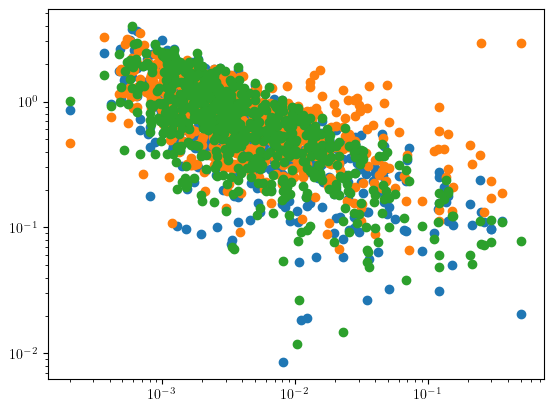

In [325]:
plt.scatter(hidden.dataframe["separation"], hidden.dataframe["VEL_2D_Chae"])
plt.scatter(hidden.dataframe["separation"], hidden.dataframe["V2D"])
plt.scatter(hidden.dataframe["separation"], hidden.dataframe["VEL_2D_Hernandez"])
plt.loglog()
#plt.xlim(0.001,0.06)
#plt.ylim(0.1,3)

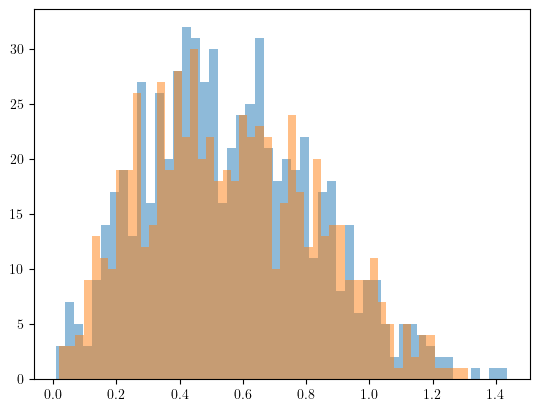

In [326]:
_=plt.hist(hidden.dataframe["v_tilde_Chae"], density=False, bins=50, alpha=0.5)
_=plt.hist(hidden.dataframe["v_tilde_Hernandez"], density=False, bins=50, alpha=0.5)

In [327]:
dataframe = hidden.dataframe

In [328]:
hist, bins = np.histogram(dataframe["separation"], bins=[0.0001, 0.001, 0.002, 0.0045, 0.01, 0.025, 0.06])

bines = []
bines_tilde = []
bines_std = []
for index, bin_ in enumerate(bins[1:]):
    mask = dataframe.loc[(dataframe['separation'] >= bins[index-1]) & (dataframe['separation'] < bins[index]), 'VEL_2D_Chae'].copy()
    bines.append(mask)
    mask = dataframe.loc[(dataframe['separation'] >= bins[index-1]) & (dataframe['separation'] < bins[index]), 'v_tilde_Chae'].copy()
    bines_tilde.append(mask)
    mask = dataframe.loc[(dataframe['separation'] >= bins[index-1]) & (dataframe['separation'] < bins[index]), 'd_V2D'].copy()
    bines_std.append(mask)

mean = []
median = []
rms = []
for vel_bins in bines:
    mean.append(np.nanmean(vel_bins))
    median.append(np.nanmedian(vel_bins))
    rms.append(np.sqrt(np.nanmean(vel_bins**2)))

/tmp/ipykernel_48539/3142857055.py:18: RuntimeWarning: Mean of empty slice
  mean.append(np.nanmean(vel_bins))
/home/aaguayoo/.cache/pypoetry/virtualenvs/binaries-statistics-38ZGLDxd-py3.10/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_48539/3142857055.py:20: RuntimeWarning: Mean of empty slice
  rms.append(np.sqrt(np.nanmean(vel_bins**2)))


/home/aaguayoo/.cache/pypoetry/virtualenvs/binaries-statistics-38ZGLDxd-py3.10/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


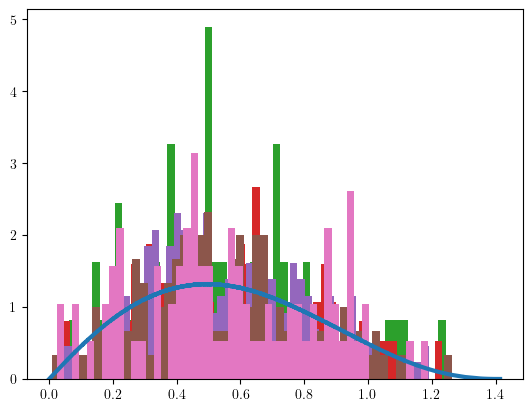

In [329]:
with open("../data/VTil.dat","r") as file:
    lines = file.readlines()
    
    v = []
    v_dist = []
    for line in lines:
        vel, dist = line.strip().split(" ")
        v.append(float(vel))
        v_dist.append(float(dist))
plt.plot(v, v_dist, linewidth=3)   
for bin_tilde in bines_tilde:
    plt.hist(bin_tilde, bins=50, density=True)
#plt.xlim(0,np.sqrt(2))

In [330]:
dataframe["VEL_2D_Chae_and_error"] = dataframe["VEL_2D_Chae"] + np.random.normal(0,dataframe["d_V2D"])

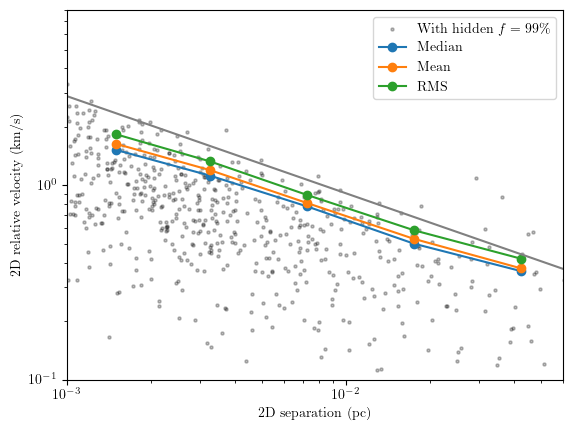

In [331]:
fig, ax = plt.subplots()
ax.scatter(dataframe["separation"],dataframe["VEL_2D_Chae_and_error"], s=5, alpha=0.25, label = f"With hidden $f={f*100:.0f}$\%", color="black")

bin_center = (bins[1:] + bins[:-1])/2

ax.plot(bin_center, median, label="Median", marker="o")
ax.plot(bin_center, mean, label="Mean", marker="o")
ax.plot(bin_center, rms, label="RMS", marker="o")
    
x = np.linspace(0.001,6e-2,1000)
ax.plot(x, 0.091*x**(-0.5), color="gray")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("2D separation (pc)")
ax.set_ylabel("2D relative velocity (km/s)")
ax.set_xlim(0.001,6e-2)
ax.set_ylim(0.1,8)
ax.legend()

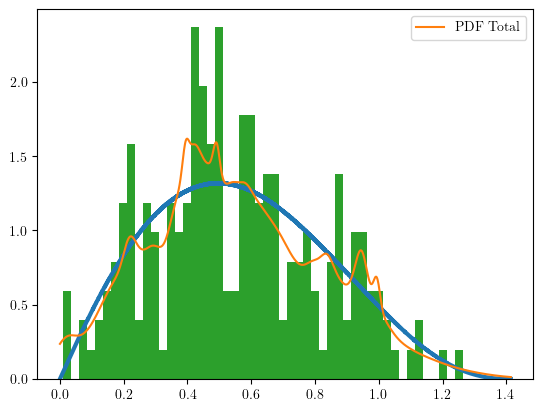

In [342]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

with open("../data/VTil.dat","r") as file:
    lines = file.readlines()
    
    v = []
    v_dist = []
    for line in lines:
        vel, dist = line.strip().split(" ")
        v.append(float(vel))
        v_dist.append(float(dist))
plt.plot(v, v_dist, linewidth=3)    

# Datos de las distribuciones gaussianas
index = 1
medias = list(bines_tilde[4]) + list(bines_tilde[5])
desviaciones_estandar = list(bines_std[4]) + list(bines_std[5])

# Crear un rango de valores para la variable aleatoria
x = np.linspace(0, np.sqrt(2), 1000)

# Inicializar la PDF total como una distribución normal con media y desviación estándar cero
pdf_total = norm.pdf(x, loc=medias[0], scale=desviaciones_estandar[0])

# Calcular la PDF de la suma de las distribuciones gaussianas
for media, desviacion in zip(medias[1:], desviaciones_estandar[1:]):
    pdf_total += norm.pdf(x, loc=media, scale=desviacion)

# Normalizar la PDF total dividiendo por el número de distribuciones
pdf_total /= len(medias) + 1

# Graficar la PDF total
plt.plot(x, pdf_total, label='PDF Total')
plt.hist(medias, density=True, bins=50)

plt.legend()
#plt.xlim(0, 4)

In [339]:
[list(bines_tilde[index]) for index in range(1,6)]

[[1.243052479555624,
  0.8366545494424841,
  1.1178693969889482,
  0.708898712853277,
  0.7034107279614015,
  0.5517289685470937,
  0.5193421085975402,
  0.5004282898193384,
  0.502372123342843,
  0.3294385755729581,
  0.22625055579774828,
  0.18473621396953774,
  0.5052670672597407,
  0.14102370291846783,
  0.28541904898099707,
  0.31738081810954283,
  0.459428483320904,
  0.7976458284937075,
  0.5094081020414537,
  0.3407121579117546,
  0.0637548950268176,
  0.8000895908102093,
  0.43993313386556426,
  1.0563904847500825,
  0.6339587413485877,
  0.41061359696246374,
  0.7241222151244482,
  0.2568435666213364,
  0.3806810569618876,
  0.20903650138368407,
  0.6468719124742857,
  0.5191380475725178,
  0.49610546744230355,
  0.47749670542454603,
  1.1001185611722106,
  0.38549579854564225,
  0.39263399766958507,
  0.6132704937345145,
  0.7837208689112851,
  0.725207170319987,
  0.7404388033187463,
  0.1546160281526592,
  0.7087194629930414,
  0.430097765021167,
  0.5039963496709878,
  0.